In [3]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/METEC Tests - Sheet3.csv')

X = pd.DataFrame(dataset.iloc[:,:2].values)
Y = pd.DataFrame(dataset.iloc[:,2:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

           0      1
0      186.0  204.0
1      186.0  204.0
2      185.0  203.0
3      186.0  204.0
4      186.0  204.0
...      ...    ...
30384  179.0  180.0
30385  178.0  180.0
30386  180.0  179.0
30387  181.0  180.0
30388    NaN    NaN

[30389 rows x 2 columns]
              0
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
...         ...
30384  0.000000
30385  0.000000
30386  0.000000
30387  0.000000
30388  0.451249

[30389 rows x 1 columns]
(24311, 2)
(24311, 1)


In [4]:
from deepforest import CascadeForestClassifier
model = CascadeForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

#using the Adaboost and CRF testing combination
estimator1 = AdaBoostClassifier(n_estimators = 100)
estimator2 = ExtraTreesClassifier(n_estimators = 100)

#load the different base layers into the model 
n_estimators = 2  # the number of base estimators per cascade layer
estimators = [AdaBoostClassifier(n_estimators= 10, random_state = 1), AdaBoostClassifier(n_estimators = 10, random_state=2), ExtraTreesClassifier(n_estimators = 10, random_state=3),ExtraTreesClassifier(n_estimators= 10, random_state = 4)]

model.set_estimator(estimators)

In [5]:
model.fit(X_train, Y_train)

ValueError: CascadeForestClassifier is used for binary and multiclass classification, wheras the training labels seem not to be any one of them.

In [ ]:
res = model.predict(X_test)
print(res)
# print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2025-03-22 21:46:15.769] Start to evalute the model:
[2025-03-22 21:46:15.769] Evaluating cascade layer = 0 
[0 0 1 ... 1 0 0]
0.9167489305692662
              precision    recall  f1-score   support

           0   0.871333  0.998231  0.930475      3392
           1   0.997263  0.813850  0.896269      2686

    accuracy                       0.916749      6078
   macro avg   0.934298  0.906040  0.913372      6078
weighted avg   0.926984  0.916749  0.915359      6078



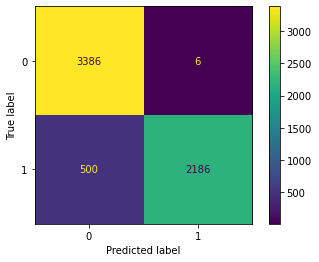

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# fig, ax = cm_display.subplots(figsize=(10, 10))
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()